This notebook is for studying trends in the abstracts from the Fall Meeting of the American Physical Society (APS) Division of Nuclear Physics (DNP).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Download-data" data-toc-modified-id="Download-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Download data</a></span></li><li><span><a href="#Create-DataFrame" data-toc-modified-id="Create-DataFrame-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create DataFrame</a></span></li><li><span><a href="#Modify-DataFrame" data-toc-modified-id="Modify-DataFrame-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modify DataFrame</a></span><ul class="toc-item"><li><span><a href="#Modify-title" data-toc-modified-id="Modify-title-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Modify title</a></span><ul class="toc-item"><li><span><a href="#Remove-HTML-tags" data-toc-modified-id="Remove-HTML-tags-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Remove HTML tags</a></span></li><li><span><a href="#Convert-HTML-entities" data-toc-modified-id="Convert-HTML-entities-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Convert HTML entities</a></span></li><li><span><a href="#Remove-leading/trailing-whitespace" data-toc-modified-id="Remove-leading/trailing-whitespace-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Remove leading/trailing whitespace</a></span></li></ul></li><li><span><a href="#Modify-text" data-toc-modified-id="Modify-text-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Modify text</a></span></li></ul></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory data analysis</a></span></li><li><span><a href="#Natural-language-processing" data-toc-modified-id="Natural-language-processing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Natural language processing</a></span><ul class="toc-item"><li><span><a href="#Text-preparation-(tokenization-and-vectorization)" data-toc-modified-id="Text-preparation-(tokenization-and-vectorization)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Text preparation (tokenization and vectorization)</a></span></li><li><span><a href="#Visualize-top-n-grams-(unigram,-bigram,-trigram)" data-toc-modified-id="Visualize-top-n-grams-(unigram,-bigram,-trigram)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Visualize top n-grams (unigram, bigram, trigram)</a></span></li><li><span><a href="#Extract-keywords-using-TF-IDF-scores-(term-frequency,-inverse-document-frequency)" data-toc-modified-id="Extract-keywords-using-TF-IDF-scores-(term-frequency,-inverse-document-frequency)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Extract keywords using TF-IDF scores (term frequency, inverse document frequency)</a></span></li></ul></li></ul></div>

# Download data

The function `download_data()` in the python script `scraper.py` scrapes information from abstracts from all the years of the APS DNP Fall Meeting.
The resulting directory structure is `./abstracts/year/identifier`.
The scraped information is stored in text files.
Each text file contains six lines:

1. Date
2. Identifier (unique for a given year)
3. Session
4. Title
5. Author(s)
6. Text

The format of each text file is checked using `check_downloaded_data_format()` in `scraper.py` and also in this notebook.
An example text file is shown below.

In [2]:
!cat abstracts/2015/KC.00001

10/30/2015
KC.00001
Session KC: Nuclear Astrophysics III
Total absorption spectroscopy of neutron-rich nuclei around the A=100 mass region
Dombos, Alexander; Algora, Alejandro; Baumann, Thomas; Brett, Jaclyn; Crider, Benjamin; Ginter, Tom; Hager, Ulrike; Kwan, Elaine; Liddick, Sean; Marks, Braden; Naqvi, Farheen; Ong, Wei Jia; Pereira, Jorge; Prokop, Christopher; Quinn, Stephen; Simon, Anna; Scriven, Dustin; Spyrou, Artemis; Sumithrarachchi, Chandana; DeYoung, Paul
\nAccurate modeling of the r-process requires knowledge of properties related to the $\\beta$-decay of neutron-rich nuclei, such as $\\beta$-decay half-lives and $\\beta$-delayed neutron emission probabilities. These properties are related to the $\\beta$-decay strength distribution, which can provide a sensitive constraint on theoretical models. Total absorption spectroscopy is a powerful technique to accurately measure quantities needed to calculate the $\\beta$-decay strength distribution. In an effort to improve models o

# Create DataFrame

In [3]:
import os
import pandas as pd

def get_raw_dataframe():

    data = {'date': [], 'identifier': [], 'session': [], 'title': [], 'authors': [], 'text': []}

    for dirpath, dirnames, filenames in sorted(os.walk('abstracts')):
        if not dirnames:
            assert filenames
            for filename in sorted(filenames):
                with open(os.path.join(dirpath, filename)) as abstract:
                    print(abstract.name)
                    lines = abstract.read().splitlines()

                assert len(lines) == 6

                date, identifier, session, title, authors, text = lines

                data['date'].append(date)
                data['identifier'].append(identifier)
                data['session'].append(session)
                data['title'].append(title)
                data['authors'].append(authors)
                data['text'].append(text)

    return pd.DataFrame(data = data)                

In [4]:
def check_raw_dataframe_format(df):

    assert all(df['date'].str.len() == 10)
    assert all(df['date'].str[2] == '/')
    assert all(df['date'].str[5] == '/')
    assert all(df['date'].str[:2].str.isdecimal())
    assert all(df['date'].str[3:5].str.isdecimal())
    assert all(df['date'].str[6:].str.isdecimal())

    assert all(df.apply(lambda row: len(row.date) == 10, axis = 1))
    assert all(df.apply(lambda row: row.date[2] == '/', axis = 1))
    assert all(df.apply(lambda row: row.date[5] == '/', axis = 1))
    assert all(df.apply(lambda row: row.date[:2].isdecimal(), axis = 1))
    assert all(df.apply(lambda row: row.date[3:5].isdecimal(), axis = 1))
    assert all(df.apply(lambda row: row.date[6:].isdecimal(), axis = 1))

    assert all(df['date'].apply(lambda date: len(date) == 10))
    assert all(df['date'].apply(lambda date: date[2] == '/'))
    assert all(df['date'].apply(lambda date: date[5] == '/'))
    assert all(df['date'].apply(lambda date: date[:2].isdecimal()))
    assert all(df['date'].apply(lambda date: date[3:5].isdecimal()))
    assert all(df['date'].apply(lambda date: date[6:].isdecimal()))

    assert all(df['identifier'].str.contains('.'))
    assert all([number in (2, 3, 4) for number in df['identifier'].str.split('.').str[0].str.len().value_counts().index])
    assert all([number == 5 for number in df['identifier'].str.split('.').str[1].str.len().value_counts().index])
    assert all(df['identifier'].str.split('.').str[1].str.isdecimal())

    assert all(df.apply(lambda row: '.' in row.identifier, axis = 1))
    assert all(df.apply(lambda row: len(row.identifier.split('.')[0]) in (2, 3, 4), axis = 1))
    assert all(df.apply(lambda row: len(row.identifier.split('.')[1]) == 5, axis = 1))
    assert all(df.apply(lambda row: row.identifier.split('.')[1].isdecimal(), axis = 1))

    assert all(df['identifier'].apply(lambda identifier: '.' in identifier))
    assert all(df['identifier'].apply(lambda identifier: len(identifier.split('.')[0]) in (2, 3, 4)))
    assert all(df['identifier'].apply(lambda identifier: len(identifier.split('.')[1]) == 5))
    assert all(df['identifier'].apply(lambda identifier: identifier.split('.')[1].isdecimal()))

    identifer_sessions = df['identifier'].str.split('.').str[0]
    assert all([session.startswith(f'Session {identifier_session}:') for identifier_session, session in zip(identifer_sessions, df['session'])])
    assert all(df.apply(lambda row: row.session.startswith(f"Session {row.identifier.split('.')[0]}:"), axis = 1))

    assert all([text in ('\\n', 'NA') for text in df['text'].str[:2]])
    assert all(df.apply(lambda row: row.text[:2] in ('\\n', 'NA'), axis = 1))
    assert all(df['text'].apply(lambda text: text[:2] in ('\\n', 'NA')))

In [5]:
from bs4 import BeautifulSoup

# Consolidate knowledge from exploratory data analysis performed in later cells
def modify_dataframe(df):

    df = df.copy()

    # Convert from string to datetime
    df['date'] = pd.to_datetime(df['date'], format = '%m/%d/%Y')

    # Remove HTML tags
    # Convert HTML entities
    # Remove leading/trailing whitespace
    df['title'] = df['title'].apply(lambda title: BeautifulSoup(title, features = 'html.parser').text.strip())

    # Decode the encoded string
    # Replace newline characters with spaces
    # Remove leading/trailing whitespace
    # Replace Unicode non-breaking space '\xa0' with a space
    df['text'] = df['text'].apply(lambda text: text.encode().decode('unicode_escape').replace('\n', ' ').strip().replace(u'\xa0', u' '))

    # Create extra columns
    df['author_count'] = df['authors'].str.split(';').str.len()
    df['text_words'] = df['text'].str.split()
    df['text_words_count'] = df['text_words'].str.len()

    return df

In [6]:
raw_df = get_raw_dataframe()

abstracts/2005/1WA.00001
abstracts/2005/1WA.00002
abstracts/2005/1WA.00003
abstracts/2005/1WA.00004
abstracts/2005/1WA.00005
abstracts/2005/1WA.00006
abstracts/2005/1WB.00001
abstracts/2005/1WB.00002
abstracts/2005/1WB.00003
abstracts/2005/1WB.00004
abstracts/2005/1WB.00005
abstracts/2005/1WB.00006
abstracts/2005/1WC.00001
abstracts/2005/1WC.00002
abstracts/2005/1WC.00003
abstracts/2005/1WC.00004
abstracts/2005/1WC.00005
abstracts/2005/1WC.00006
abstracts/2005/1WD.00001
abstracts/2005/1WD.00002
abstracts/2005/1WD.00003
abstracts/2005/1WD.00004
abstracts/2005/1WD.00005
abstracts/2005/1WD.00006
abstracts/2005/1WE.00001
abstracts/2005/1WE.00002
abstracts/2005/1WE.00003
abstracts/2005/1WE.00004
abstracts/2005/1WE.00005
abstracts/2005/1WE.00006
abstracts/2005/1WE.00007
abstracts/2005/1WF.00001
abstracts/2005/1WF.00002
abstracts/2005/1WF.00003
abstracts/2005/1WF.00004
abstracts/2005/1WF.00005
abstracts/2005/1WF.00006
abstracts/2005/1WG.00001
abstracts/2005/1WG.00002
abstracts/2005/1WG.00003


abstracts/2005/KL.00003
abstracts/2005/KL.00004
abstracts/2005/KL.00005
abstracts/2005/KL.00006
abstracts/2005/KL.00007
abstracts/2005/KL.00008
abstracts/2005/KL.00009
abstracts/2005/KL.00010
abstracts/2005/KL.00011
abstracts/2005/KL.00012
abstracts/2005/KL.00013
abstracts/2006/1WA.00001
abstracts/2006/1WA.00002
abstracts/2006/1WA.00003
abstracts/2006/1WA.00004
abstracts/2006/1WA.00005
abstracts/2006/1WA.00006
abstracts/2006/1WA.00007
abstracts/2006/1WB.00001
abstracts/2006/1WB.00002
abstracts/2006/1WB.00003
abstracts/2006/1WB.00004
abstracts/2006/1WB.00005
abstracts/2006/1WB.00006
abstracts/2006/1WB.00007
abstracts/2006/2WA.00001
abstracts/2006/2WA.00002
abstracts/2006/2WA.00003
abstracts/2006/2WA.00004
abstracts/2006/2WA.00005
abstracts/2006/2WA.00006
abstracts/2006/2WB.00001
abstracts/2006/2WB.00002
abstracts/2006/2WC.00001
abstracts/2006/2WC.00002
abstracts/2006/2WC.00003
abstracts/2006/2WC.00004
abstracts/2006/2WC.00005
abstracts/2006/2WC.00006
abstracts/2006/2WC.00007
abstracts/2

abstracts/2007/DA.00005
abstracts/2007/DA.00006
abstracts/2007/DA.00007
abstracts/2007/DA.00008
abstracts/2007/DA.00009
abstracts/2007/DA.00010
abstracts/2007/DA.00011
abstracts/2007/DA.00012
abstracts/2007/DA.00013
abstracts/2007/DA.00014
abstracts/2007/DA.00015
abstracts/2007/DA.00016
abstracts/2007/DA.00017
abstracts/2007/DA.00018
abstracts/2007/DA.00019
abstracts/2007/DA.00020
abstracts/2007/DA.00021
abstracts/2007/DA.00022
abstracts/2007/DA.00023
abstracts/2007/DA.00024
abstracts/2007/DA.00025
abstracts/2007/DA.00026
abstracts/2007/DA.00027
abstracts/2007/DA.00028
abstracts/2007/DA.00029
abstracts/2007/DA.00030
abstracts/2007/DA.00031
abstracts/2007/DA.00032
abstracts/2007/DA.00033
abstracts/2007/DA.00034
abstracts/2007/DA.00035
abstracts/2007/DA.00036
abstracts/2007/DA.00037
abstracts/2007/DA.00038
abstracts/2007/DA.00039
abstracts/2007/DA.00040
abstracts/2007/DA.00041
abstracts/2007/DA.00042
abstracts/2007/DA.00043
abstracts/2007/DA.00044
abstracts/2007/DA.00045
abstracts/2007/D

abstracts/2008/MC.00005
abstracts/2008/MC.00006
abstracts/2008/MC.00007
abstracts/2008/MC.00008
abstracts/2008/MC.00009
abstracts/2008/MD.00001
abstracts/2008/MD.00002
abstracts/2008/MD.00003
abstracts/2008/MD.00004
abstracts/2008/MD.00005
abstracts/2008/MD.00006
abstracts/2008/MD.00007
abstracts/2008/MD.00008
abstracts/2008/MD.00009
abstracts/2008/ME.00001
abstracts/2008/ME.00002
abstracts/2008/ME.00003
abstracts/2008/ME.00004
abstracts/2008/ME.00005
abstracts/2008/ME.00006
abstracts/2008/ME.00007
abstracts/2008/ME.00008
abstracts/2008/MF.00001
abstracts/2008/MF.00002
abstracts/2008/MF.00003
abstracts/2008/MF.00004
abstracts/2008/MF.00005
abstracts/2008/MF.00006
abstracts/2008/MF.00007
abstracts/2008/MF.00008
abstracts/2008/MF.00009
abstracts/2008/MG.00001
abstracts/2008/MG.00002
abstracts/2008/MG.00003
abstracts/2008/MG.00004
abstracts/2008/MG.00005
abstracts/2008/MG.00006
abstracts/2008/MG.00007
abstracts/2008/MG.00008
abstracts/2008/MG.00009
abstracts/2008/MH.00001
abstracts/2008/M

abstracts/2009/KJ.00006
abstracts/2009/KJ.00007
abstracts/2009/KJ.00008
abstracts/2009/KJ.00009
abstracts/2009/KJ.00010
abstracts/2009/KJ.00011
abstracts/2009/KJ.00012
abstracts/2009/KJ.00013
abstracts/2009/KK.00001
abstracts/2009/KK.00002
abstracts/2009/KK.00003
abstracts/2009/KK.00004
abstracts/2009/KK.00005
abstracts/2009/KK.00006
abstracts/2009/KK.00007
abstracts/2009/KK.00008
abstracts/2009/KK.00009
abstracts/2009/KK.00010
abstracts/2009/KK.00011
abstracts/2009/KK.00012
abstracts/2009/KK.00013
abstracts/2009/KL.00001
abstracts/2009/KL.00002
abstracts/2009/KL.00003
abstracts/2009/KL.00004
abstracts/2009/KL.00005
abstracts/2009/KL.00006
abstracts/2009/KL.00007
abstracts/2009/KL.00008
abstracts/2009/KL.00009
abstracts/2009/KL.00010
abstracts/2009/KL.00011
abstracts/2009/LA.00001
abstracts/2009/LA.00002
abstracts/2009/LA.00003
abstracts/2009/LA.00004
abstracts/2009/LB.00001
abstracts/2009/LB.00002
abstracts/2009/LB.00003
abstracts/2009/LB.00004
abstracts/2009/LB.00005
abstracts/2009/L

abstracts/2011/EA.00009
abstracts/2011/EA.00010
abstracts/2011/EA.00011
abstracts/2011/EA.00012
abstracts/2011/EA.00013
abstracts/2011/EA.00014
abstracts/2011/EA.00015
abstracts/2011/EA.00016
abstracts/2011/EA.00017
abstracts/2011/EA.00018
abstracts/2011/EA.00019
abstracts/2011/EA.00020
abstracts/2011/EA.00021
abstracts/2011/EA.00022
abstracts/2011/EA.00023
abstracts/2011/EA.00024
abstracts/2011/EA.00025
abstracts/2011/EA.00026
abstracts/2011/EA.00027
abstracts/2011/EA.00028
abstracts/2011/EA.00029
abstracts/2011/EA.00030
abstracts/2011/EA.00031
abstracts/2011/EA.00032
abstracts/2011/EA.00033
abstracts/2011/EA.00034
abstracts/2011/EA.00035
abstracts/2011/EA.00036
abstracts/2011/EA.00037
abstracts/2011/EA.00038
abstracts/2011/EA.00039
abstracts/2011/EA.00040
abstracts/2011/EA.00041
abstracts/2011/EA.00042
abstracts/2011/EA.00043
abstracts/2011/EA.00044
abstracts/2011/EA.00045
abstracts/2011/EA.00046
abstracts/2011/EA.00047
abstracts/2011/EA.00048
abstracts/2011/EA.00049
abstracts/2011/E

abstracts/2012/JE.00006
abstracts/2012/JE.00007
abstracts/2012/JE.00008
abstracts/2012/JE.00009
abstracts/2012/JF.00001
abstracts/2012/JF.00002
abstracts/2012/JF.00003
abstracts/2012/JF.00004
abstracts/2012/JF.00005
abstracts/2012/JF.00006
abstracts/2012/JF.00007
abstracts/2012/JF.00008
abstracts/2012/JF.00009
abstracts/2012/KA.00001
abstracts/2012/KA.00002
abstracts/2012/KB.00001
abstracts/2012/KB.00002
abstracts/2012/KB.00003
abstracts/2012/KB.00004
abstracts/2012/KB.00005
abstracts/2012/KB.00006
abstracts/2012/KB.00007
abstracts/2012/KB.00008
abstracts/2012/KC.00001
abstracts/2012/KC.00002
abstracts/2012/KC.00003
abstracts/2012/KC.00004
abstracts/2012/KC.00005
abstracts/2012/KC.00006
abstracts/2012/KC.00007
abstracts/2012/KC.00008
abstracts/2012/KC.00009
abstracts/2012/KC.00010
abstracts/2012/KD.00001
abstracts/2012/KD.00002
abstracts/2012/KD.00003
abstracts/2012/KD.00004
abstracts/2012/KD.00005
abstracts/2012/KD.00006
abstracts/2012/KD.00007
abstracts/2012/KD.00008
abstracts/2012/K

abstracts/2013/PD.00009
abstracts/2013/PE.00001
abstracts/2013/PE.00002
abstracts/2013/PE.00003
abstracts/2013/PE.00004
abstracts/2013/PE.00005
abstracts/2013/PE.00006
abstracts/2013/PE.00007
abstracts/2013/PE.00008
abstracts/2013/PE.00009
abstracts/2013/PF.00001
abstracts/2013/PF.00002
abstracts/2013/PF.00003
abstracts/2013/PF.00004
abstracts/2013/PF.00005
abstracts/2013/PF.00006
abstracts/2013/PF.00007
abstracts/2013/PF.00008
abstracts/2013/PF.00009
abstracts/2013/PG.00001
abstracts/2013/PG.00002
abstracts/2013/PG.00003
abstracts/2013/PG.00004
abstracts/2013/PG.00005
abstracts/2013/PG.00006
abstracts/2013/PG.00007
abstracts/2013/PG.00008
abstracts/2013/PH.00001
abstracts/2013/PH.00002
abstracts/2013/PH.00003
abstracts/2013/PH.00004
abstracts/2013/PH.00005
abstracts/2013/PJ.00001
abstracts/2013/PJ.00002
abstracts/2013/PJ.00003
abstracts/2013/PJ.00004
abstracts/2013/PJ.00005
abstracts/2013/PJ.00006
abstracts/2013/PJ.00007
abstracts/2013/PJ.00008
abstracts/2013/PJ.00009
abstracts/2014/1

abstracts/2014/GB.00161
abstracts/2014/HA.00001
abstracts/2014/HB.00001
abstracts/2014/JA.00001
abstracts/2014/KA.00001
abstracts/2014/KA.00002
abstracts/2014/KA.00003
abstracts/2014/KA.00004
abstracts/2014/KB.00001
abstracts/2014/KB.00002
abstracts/2014/KB.00003
abstracts/2014/KB.00004
abstracts/2014/KB.00005
abstracts/2014/KB.00006
abstracts/2014/KB.00007
abstracts/2014/KB.00008
abstracts/2014/KB.00009
abstracts/2014/KB.00010
abstracts/2014/KC.00001
abstracts/2014/KC.00002
abstracts/2014/KC.00003
abstracts/2014/KC.00004
abstracts/2014/KC.00005
abstracts/2014/KC.00006
abstracts/2014/KC.00007
abstracts/2014/KC.00008
abstracts/2014/KC.00009
abstracts/2014/KC.00010
abstracts/2014/KC.00011
abstracts/2014/KD.00001
abstracts/2014/KD.00002
abstracts/2014/KD.00003
abstracts/2014/KD.00004
abstracts/2014/KD.00005
abstracts/2014/KD.00006
abstracts/2014/KD.00007
abstracts/2014/KD.00008
abstracts/2014/KD.00009
abstracts/2014/KD.00010
abstracts/2014/KD.00011
abstracts/2014/KD.00012
abstracts/2014/K

abstracts/2015/PH.00005
abstracts/2015/PH.00006
abstracts/2015/PH.00007
abstracts/2015/PH.00008
abstracts/2015/PH.00009
abstracts/2015/PJ.00001
abstracts/2015/PJ.00002
abstracts/2015/PJ.00003
abstracts/2015/PJ.00004
abstracts/2015/PJ.00005
abstracts/2015/PJ.00006
abstracts/2015/PJ.00007
abstracts/2015/PJ.00008
abstracts/2015/PJ.00009
abstracts/2016/1WB.00001
abstracts/2016/1WB.00002
abstracts/2016/1WB.00003
abstracts/2016/1WC.00001
abstracts/2016/1WC.00002
abstracts/2016/1WC.00003
abstracts/2016/1WD.00001
abstracts/2016/1WD.00002
abstracts/2016/1WD.00003
abstracts/2016/2WB.00001
abstracts/2016/2WB.00002
abstracts/2016/2WC.00001
abstracts/2016/2WC.00002
abstracts/2016/2WD.00001
abstracts/2016/2WD.00002
abstracts/2016/AA.00001
abstracts/2016/AA.00002
abstracts/2016/AA.00003
abstracts/2016/AA.00004
abstracts/2016/AA.00005
abstracts/2016/BA.00001
abstracts/2016/CB.00001
abstracts/2016/CB.00002
abstracts/2016/CB.00003
abstracts/2016/CC.00001
abstracts/2016/CC.00002
abstracts/2016/CC.00003
a

abstracts/2017/EA.00065
abstracts/2017/EA.00066
abstracts/2017/EA.00067
abstracts/2017/EA.00068
abstracts/2017/EA.00069
abstracts/2017/EA.00070
abstracts/2017/EA.00071
abstracts/2017/EA.00072
abstracts/2017/EA.00073
abstracts/2017/EA.00074
abstracts/2017/EA.00075
abstracts/2017/EA.00076
abstracts/2017/EA.00077
abstracts/2017/EA.00078
abstracts/2017/EA.00079
abstracts/2017/EA.00080
abstracts/2017/EA.00081
abstracts/2017/EA.00082
abstracts/2017/EA.00083
abstracts/2017/EA.00084
abstracts/2017/EA.00085
abstracts/2017/EA.00086
abstracts/2017/EA.00087
abstracts/2017/EA.00088
abstracts/2017/EA.00089
abstracts/2017/EA.00090
abstracts/2017/EA.00091
abstracts/2017/EA.00092
abstracts/2017/EA.00093
abstracts/2017/EA.00094
abstracts/2017/EA.00095
abstracts/2017/EA.00096
abstracts/2017/EA.00097
abstracts/2017/EA.00098
abstracts/2017/EA.00099
abstracts/2017/EA.00100
abstracts/2017/EA.00101
abstracts/2017/EA.00102
abstracts/2017/EA.00103
abstracts/2017/EA.00104
abstracts/2017/EA.00105
abstracts/2017/E

abstracts/2018/DN.00008
abstracts/2018/DN.00009
abstracts/2018/DN.00010
abstracts/2018/DN.00011
abstracts/2018/DP.00001
abstracts/2018/DP.00002
abstracts/2018/DP.00003
abstracts/2018/DP.00004
abstracts/2018/DP.00005
abstracts/2018/DP.00006
abstracts/2018/DP.00007
abstracts/2018/DP.00008
abstracts/2018/DP.00009
abstracts/2018/DP.00010
abstracts/2018/DP.00011
abstracts/2018/EA.00001
abstracts/2018/EA.00002
abstracts/2018/EA.00003
abstracts/2018/EA.00004
abstracts/2018/EB.00001
abstracts/2018/EB.00002
abstracts/2018/EB.00003
abstracts/2018/EB.00004
abstracts/2018/EB.00005
abstracts/2018/EB.00006
abstracts/2018/EB.00007
abstracts/2018/EB.00008
abstracts/2018/EB.00009
abstracts/2018/EC.00001
abstracts/2018/EC.00002
abstracts/2018/EC.00003
abstracts/2018/EC.00004
abstracts/2018/EC.00005
abstracts/2018/EC.00006
abstracts/2018/EC.00007
abstracts/2018/EC.00008
abstracts/2018/ED.00001
abstracts/2018/ED.00002
abstracts/2018/ED.00003
abstracts/2018/ED.00004
abstracts/2018/ED.00005
abstracts/2018/E

abstracts/2019/HA.00011
abstracts/2019/HA.00012
abstracts/2019/HA.00013
abstracts/2019/HA.00014
abstracts/2019/HA.00015
abstracts/2019/HA.00016
abstracts/2019/HA.00017
abstracts/2019/HA.00018
abstracts/2019/HA.00019
abstracts/2019/HA.00020
abstracts/2019/HA.00021
abstracts/2019/HA.00022
abstracts/2019/HA.00023
abstracts/2019/HA.00024
abstracts/2019/HA.00025
abstracts/2019/HA.00026
abstracts/2019/HA.00027
abstracts/2019/HA.00028
abstracts/2019/HA.00029
abstracts/2019/HA.00030
abstracts/2019/HA.00031
abstracts/2019/HA.00032
abstracts/2019/HA.00033
abstracts/2019/HA.00034
abstracts/2019/HA.00035
abstracts/2019/HA.00036
abstracts/2019/HA.00037
abstracts/2019/HA.00038
abstracts/2019/HA.00039
abstracts/2019/HA.00040
abstracts/2019/HA.00041
abstracts/2019/HA.00042
abstracts/2019/HA.00043
abstracts/2019/HA.00044
abstracts/2019/HA.00045
abstracts/2019/HA.00046
abstracts/2019/HA.00047
abstracts/2019/HA.00048
abstracts/2019/HA.00049
abstracts/2019/HA.00050
abstracts/2019/HA.00051
abstracts/2019/H

abstracts/2020/KC.00002
abstracts/2020/KC.00003
abstracts/2020/KC.00004
abstracts/2020/KC.00005
abstracts/2020/KC.00006
abstracts/2020/KC.00007
abstracts/2020/KC.00008
abstracts/2020/KC.00009
abstracts/2020/KD.00001
abstracts/2020/KD.00002
abstracts/2020/KD.00003
abstracts/2020/KD.00004
abstracts/2020/KD.00005
abstracts/2020/KD.00006
abstracts/2020/KD.00007
abstracts/2020/KD.00008
abstracts/2020/KD.00009
abstracts/2020/KE.00001
abstracts/2020/KE.00002
abstracts/2020/KE.00003
abstracts/2020/KE.00004
abstracts/2020/KE.00005
abstracts/2020/KE.00006
abstracts/2020/KF.00001
abstracts/2020/KF.00002
abstracts/2020/KF.00003
abstracts/2020/KF.00004
abstracts/2020/KF.00005
abstracts/2020/KF.00006
abstracts/2020/KF.00007
abstracts/2020/KG.00001
abstracts/2020/KG.00002
abstracts/2020/KG.00003
abstracts/2020/KG.00004
abstracts/2020/KG.00005
abstracts/2020/KG.00006
abstracts/2020/KG.00007
abstracts/2020/KH.00001
abstracts/2020/KH.00002
abstracts/2020/KH.00003
abstracts/2020/KH.00004
abstracts/2020/K

abstracts/2021/FK.00008
abstracts/2021/FK.00009
abstracts/2021/FL.00001
abstracts/2021/FL.00002
abstracts/2021/FL.00003
abstracts/2021/FL.00004
abstracts/2021/FL.00005
abstracts/2021/FL.00006
abstracts/2021/FL.00007
abstracts/2021/FL.00008
abstracts/2021/FL.00009
abstracts/2021/FL.00010
abstracts/2021/FM.00001
abstracts/2021/FM.00002
abstracts/2021/FM.00003
abstracts/2021/FM.00004
abstracts/2021/FM.00005
abstracts/2021/FM.00006
abstracts/2021/FM.00007
abstracts/2021/FM.00008
abstracts/2021/FM.00009
abstracts/2021/FM.00010
abstracts/2021/FN.00001
abstracts/2021/FN.00002
abstracts/2021/FN.00003
abstracts/2021/FN.00004
abstracts/2021/FN.00005
abstracts/2021/FN.00006
abstracts/2021/FN.00007
abstracts/2021/GA.00001
abstracts/2021/GA.00002
abstracts/2021/GA.00003
abstracts/2021/GA.00004
abstracts/2021/GA.00005
abstracts/2021/GA.00006
abstracts/2021/GA.00007
abstracts/2021/GA.00008
abstracts/2021/GA.00009
abstracts/2021/GA.00010
abstracts/2021/GA.00011
abstracts/2021/GA.00012
abstracts/2021/G

In [7]:
check_raw_dataframe_format(raw_df)

In [8]:
raw_df

,date,identifier,session,title,authors,text
0,09/18/2005,1WA.00001,Session 1WA: Workshop 1A: Nuclear/Hadron Physi...,QCD and Hadron Physics,"Ji, Xiangdong",NA
1,09/18/2005,1WA.00002,Session 1WA: Workshop 1A: Nuclear/Hadron Physi...,Strangeness Production in Electromagnetic Inte...,"Carman, Daniel S.",\nA program of strange particle production off...
2,09/18/2005,1WA.00003,Session 1WA: Workshop 1A: Nuclear/Hadron Physi...,Hypernuclear spectroscopy at JLab,"Nakamura, Satoshi N.",\nLambda hypernuclei have been extensively stu...
3,09/18/2005,1WA.00004,Session 1WA: Workshop 1A: Nuclear/Hadron Physi...,Dynamical Models of Electromagnetic Production...,"Lee, Tsung-Shung H.","\nIn the nucleon resonance region, Kaon produc..."
4,09/18/2005,1WA.00005,Session 1WA: Workshop 1A: Nuclear/Hadron Physi...,Three- and four-body structure of light hypern...,"Hiyama, Emiko",\nTwo important goals of hypernuclear physics ...
...,...,...,...,...,...,...
12967,10/14/2021,QM.00007,Session QM: Mini-Symposium: The Next Generatio...,Growing representation in nuclear physics in E...,"Fomin, Nadia",\nWe have recruited a cohort of 10 undergradua...
12968,10/14/2021,QM.00008,Session QM: Mini-Symposium: The Next Generatio...,HADRONS: Helping Amplify Diversity and Researc...,"Navarro Perez, Rodrigo; Johnson, Calvin; Weber...",\nThis new traineeship program aims to broaden...
12969,10/14/2021,QM.00009,Session QM: Mini-Symposium: The Next Generatio...,Machine learning techniques for analyzing mult...,"Redpath, Thomas; Brayton, Megan; Orton, Darrius",\nThe goal of this project is to provide stude...
12970,10/14/2021,QM.00010,Session QM: Mini-Symposium: The Next Generatio...,Pathways to Improved Representation in Advance...,"Wamba, Kolo; Hein, Emilie",\nOur project will foster Skyline College stud...


In [9]:
# Use datetime so I can reference dates (years) based on the git log
raw_mod_df = raw_df.copy()
raw_mod_df['date'] = pd.to_datetime(raw_mod_df['date'], format = '%m/%d/%Y')
# Get modified dataframe so I can check modifications as I go along
modified_df = modify_dataframe(raw_df)

# Modify DataFrame

## Modify title

Looking at the git log from 2021-12-10, the abstract title needs to be modified as follows:

1. Remove HTML tags
2. Convert HTML entities
3. Remove leading/trailing whitespace

### Remove HTML tags

First, I want to display the full title referenced in the git log.
When printed, the title is truncated.
One solution is to use pd.set_option('display.max_colwidth', None).
However, that affects the entire notebook.
An alternative is to use iloc/loc, which prints the full title for just the single cell.
See [this](https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe) for details.

In [10]:
print(raw_mod_df[(raw_mod_df['date'].dt.year == 2018) & (raw_mod_df['identifier'] == '1WAB.00002')]['title'])
print(raw_mod_df.query('date.dt.year == 2018 and identifier == "1WAB.00002"')['title'])

print('=====')
series = raw_mod_df.query('date.dt.year == 2018 and identifier == "1WAB.00002"')['title']
print(raw_mod_df.loc[series.index[0], 'title'])
print(series.values[0])

9148    Role of fission in the <i>r</i>-process nucleo...
Name: title, dtype: object
9148    Role of fission in the <i>r</i>-process nucleo...
Name: title, dtype: object
=====
Role of fission in the <i>r</i>-process nucleosynthesis
Role of fission in the <i>r</i>-process nucleosynthesis


In [11]:
from bs4 import BeautifulSoup

print(BeautifulSoup(series.values[0], features = 'html.parser'))
print(BeautifulSoup(series.values[0], features = 'html.parser').text)

print('=====')
print(modified_df.loc[series.index[0], 'title'])

Role of fission in the <i>r</i>-process nucleosynthesis
Role of fission in the r-process nucleosynthesis
=====
Role of fission in the r-process nucleosynthesis


### Convert HTML entities

In [12]:
series = raw_mod_df.query('date.dt.year == 2019 and identifier == "2WE.00003"')['title']
print(series.values[0])

print(BeautifulSoup(series.values[0], features = 'html.parser'))
print(BeautifulSoup(series.values[0], features = 'html.parser').text)

print('=====')
print(modified_df.loc[series.index[0], 'title'])

The significance of a neutron star&#039;s interior composition
The significance of a neutron star's interior composition
The significance of a neutron star's interior composition
=====
The significance of a neutron star's interior composition


### Remove leading/trailing whitespace

In [13]:
series = raw_mod_df.query('date.dt.year == 2005 and identifier == "DD.00010"')['title']
print(repr(series.values[0]))

print(repr(BeautifulSoup(series.values[0], features = 'html.parser')))
print(repr(BeautifulSoup(series.values[0], features = 'html.parser').text))
print(repr(BeautifulSoup(series.values[0], features = 'html.parser').text.strip()))

print('=====')
print(repr(modified_df.loc[series.index[0], 'title']))

'Present and future measurements on hadronization in strongly interacting partonic matter at RHIC and RHIC-II. '
Present and future measurements on hadronization in strongly interacting partonic matter at RHIC and RHIC-II. 
'Present and future measurements on hadronization in strongly interacting partonic matter at RHIC and RHIC-II. '
'Present and future measurements on hadronization in strongly interacting partonic matter at RHIC and RHIC-II.'
=====
'Present and future measurements on hadronization in strongly interacting partonic matter at RHIC and RHIC-II.'


## Modify text

Looking at the git log from 2021-12-07 and 2021-12-15, newline characters need to be removed from the text.
For the text, I saved the encoded string from the abstract.
This allows anyone to copy the text from a text file and paste the text into an interpreter to print.
However, when reading the text from a file, the string representation contains escaped escape characters.
The best way to deal with this is to decode the encoded string (see [this](https://stackoverflow.com/questions/5186839/python-replace-with) and [this](https://stackoverflow.com/questions/50199840/python3-replacing-double-backslash-with-single-backslash) for more details).

I'm not sure how to deal with the LaTeX formatting in the text.

In [14]:
# Copy and paste from a text file (2015 KC.00001)
print('\nAccurate modeling of the r-process requires knowledge of properties related to the $\\beta$-decay of neutron-rich nuclei, such as $\\beta$-decay half-lives and $\\beta$-delayed neutron emission probabilities. These properties are related to the $\\beta$-decay strength distribution, which can provide a sensitive constraint on theoretical models. Total absorption spectroscopy is a powerful technique to accurately measure quantities needed to calculate the $\\beta$-decay strength distribution. In an effort to improve models of the r-process, the total absorption spectra of neutron-rich nuclei in the mass region around A=100 were recently measured using the Summing NaI(Tl) (SuN) detector at the NSCL in the first ever total absorption spectroscopy measurement performed in a fragmentation facility. Total absorption spectra will be presented and the extracted $\\beta$-decay feeding intensities will be compared to theoretical calculations.\n')
print('=====')
# Decode the encoded string to obtain the same result
series = raw_mod_df.query('date.dt.year == 2015 and identifier == "KC.00001"')
print(raw_mod_df.loc[series.index[0], 'text'].encode().decode('unicode_escape'))


Accurate modeling of the r-process requires knowledge of properties related to the $\beta$-decay of neutron-rich nuclei, such as $\beta$-decay half-lives and $\beta$-delayed neutron emission probabilities. These properties are related to the $\beta$-decay strength distribution, which can provide a sensitive constraint on theoretical models. Total absorption spectroscopy is a powerful technique to accurately measure quantities needed to calculate the $\beta$-decay strength distribution. In an effort to improve models of the r-process, the total absorption spectra of neutron-rich nuclei in the mass region around A=100 were recently measured using the Summing NaI(Tl) (SuN) detector at the NSCL in the first ever total absorption spectroscopy measurement performed in a fragmentation facility. Total absorption spectra will be presented and the extracted $\beta$-decay feeding intensities will be compared to theoretical calculations.

=====

Accurate modeling of the r-process requires knowled

In [15]:
label = 2
print(raw_df.loc[label, 'text'])
print('=====')
print(repr(raw_df.loc[label, 'text']))
print('=====')
print(repr(raw_df.loc[label, 'text'].encode().decode('unicode_escape')))
print('=====')
print(raw_df.loc[label, 'text'].encode().decode('unicode_escape'))

\nLambda hypernuclei have been extensively studied\nby using the meson-induced reactions,\nsuch as ($\\pi^+$, K$^+$) and (K$^-$, $\\pi^-$) at KEK and BNL.\nThe (e,e$'$K$^+$) reaction is a new method for hypernuclear\nspectroscopy, and it has unique advantages over those\nmeson-induced reactions.\nFor example, the (e,e$'$K$^+$) reaction excites spin-flip\nas well as spin-non-flip $\\Lambda$ hypernuclear states and\nproduces neutron\nrich $\\Lambda$ hypernuclei by converting a proton to a $\\Lambda$\nhyperon.\nFrom the experimental point of view, it is a great advantage that\na high-quality electron beam available at JLab allows us to improve\nthe energy resolution down to sub-MeV levels.\nEncouraged by the success of the first hypernuclear spectroscopy\nthrough\nthe (e,e$'$K$^+$) reaction (JLab E89-009), a new improved experiment\nwith a newly developed High resolution Kaon Spectrometer (HKS) and\na new configuration of the electron spectrometer is going to start\nat JLab Hall C (JLab E

Based on what I see above, I need to replace a newline character with a space, and then remove the leading/trailing whitespace.
This fixes the instance with label 2, as shown below.

In [16]:
label = 2
print(repr(raw_df.loc[label, 'text']))
print('=====')
print(repr(raw_df.loc[label, 'text'].encode().decode('unicode_escape').replace('\n', '')))
print('=====')
print(repr(raw_df.loc[label, 'text'].encode().decode('unicode_escape').replace('\n', ' ')))
print('=====')
print(repr(raw_df.loc[label, 'text'].encode().decode('unicode_escape').replace('\n', ' ').strip()))

assert raw_df.loc[label, 'text'].encode().decode('unicode_escape').replace('\n', ' ').strip() == modified_df.loc[label, 'text']

"\\nLambda hypernuclei have been extensively studied\\nby using the meson-induced reactions,\\nsuch as ($\\\\pi^+$, K$^+$) and (K$^-$, $\\\\pi^-$) at KEK and BNL.\\nThe (e,e$'$K$^+$) reaction is a new method for hypernuclear\\nspectroscopy, and it has unique advantages over those\\nmeson-induced reactions.\\nFor example, the (e,e$'$K$^+$) reaction excites spin-flip\\nas well as spin-non-flip $\\\\Lambda$ hypernuclear states and\\nproduces neutron\\nrich $\\\\Lambda$ hypernuclei by converting a proton to a $\\\\Lambda$\\nhyperon.\\nFrom the experimental point of view, it is a great advantage that\\na high-quality electron beam available at JLab allows us to improve\\nthe energy resolution down to sub-MeV levels.\\nEncouraged by the success of the first hypernuclear spectroscopy\\nthrough\\nthe (e,e$'$K$^+$) reaction (JLab E89-009), a new improved experiment\\nwith a newly developed High resolution Kaon Spectrometer (HKS) and\\na new configuration of the electron spectrometer is going to

After more investigating, a Unicode non-breaking space `\xa0` should be replaced with a space.
See [this](https://stackoverflow.com/questions/10993612/how-to-remove-xa0-from-string-in-python) for more details.
Use `grep -r "xa0" abstracts/` to find all occurrences.

In [17]:
label = 12970
print(repr(raw_df.loc[label, 'text']))
print('=====')
print(repr(raw_df.loc[label, 'text'].encode().decode('unicode_escape').replace('\n', '')))
print('=====')
print(repr(raw_df.loc[label, 'text'].encode().decode('unicode_escape').replace('\n', ' ')))
print('=====')
print(repr(raw_df.loc[label, 'text'].encode().decode('unicode_escape').replace('\n', ' ').strip()))
print('=====')
print(repr(raw_df.loc[label, 'text'].encode().decode('unicode_escape').replace('\n', ' ').strip().replace(u'\xa0', u' ')))

assert raw_df.loc[label, 'text'].encode().decode('unicode_escape').replace('\n', ' ').strip().replace(u'\xa0', u' ') == modified_df.loc[label, 'text']

'\\nOur project will foster Skyline College student involvement in ongoing research and development for the next Enriched Xenon Observatory (nEXO). An international collaboration of 150 individuals representing 40 institutions, nEXO will perform a nuclear physics experiment to search for\\xa0neutrinoless double-beta decay (0νββ) in Xe-136. Skyline College, a minority-serving institution (MSI), will give students the chance to participate in original\\xa0research in nuclear physics, with an aim to increase the likelihood that students from underrepresented populations will pursue graduate studies in nuclear physics, thereby helping to diversify the field. Our 8 student trainees will develop hardware and software to support nEXO R&D in: (a) purity tests of candidate detector materials; (b) vacuum and xenon gas management;\\xa0(c) data acquisition and analysis. The\\xa0nEXO detector is a Time Projection Chamber (TPC) containing 5 t of liquid xenon enriched to 90% in the isotope Xe-136.\\x

# Exploratory data analysis

To determine the words in the text, the text should be split by runs of consecutive whitespace, not just a single space, as shown in the cell below.

In [18]:
# Note: when printing a series, both set() and {''} are printed the same way, despite being different (see example below)
print(modified_df['text'].apply(lambda x: set(x.split(' ')) - set(x.split())))
print('=====')
print(type(set()), repr(set()), len(set()))
print(type({''}), repr({''}), len({''}))
print(pd.Series({0: set(), 1: {''}})) # When printing a series, both set() and {''} are printed the same way, despite being different. This is something to investigate...

# Use the code below to find potential differences between the two approaches
# Unlike a series, when printing a set, set() and {''} are printed differently
print('=====')
for label in (0, 1, 2, 3, 4, 5, 6, 12967, 12970):
    difference_1 = set(modified_df.loc[label, 'text'].split(' ')) - set(modified_df.loc[label, 'text'].split())
    difference_2 = set(modified_df.loc[label, 'text'].split()) - set(modified_df.loc[label, 'text'].split(' '))
    print(difference_1, len(difference_1),
          difference_2, len(difference_2))

print('=====')
print(modified_df.loc[1, 'text'])
print('are to better understand  the reaction mechanism'.split(' '))
print('are to better understand  the reaction mechanism'.split())

print('=====')
label = 12970
print(modified_df.loc[label, 'text'].split(' '))
print(modified_df.loc[label, 'text'].split())

0        {}
1        {}
2        {}
3        {}
4        {}
         ..
12967    {}
12968    {}
12969    {}
12970    {}
12971    {}
Name: text, Length: 12972, dtype: object
=====
<class 'set'> set() 0
<class 'set'> {''} 1
0    {}
1    {}
dtype: object
=====
set() 0 set() 0
{''} 1 set() 0
set() 0 set() 0
set() 0 set() 0
{''} 1 set() 0
set() 0 set() 0
{''} 1 set() 0
{''} 1 set() 0
{''} 1 set() 0
=====
A program of strange particle production off the proton is currently underway with the CLAS spectrometer in Hall B at Jefferson Laboratory. Measurements have been carried out at energies up to 6~GeV with electron  and real photon beams, both of which are available with high polarization. This talk will focus on a detailed overview of the results of our measurement  program, which is designed to measure cross sections and polarization  observables for $K^+\Lambda$ and $K^+\Sigma^0$ final states over a broad  kinematic range in $Q^2$ from 0.5 to 3.5~(GeV/c)$^2$ and $W$ from threshold  to 3.0~

The author lists are not standardized.
For example, the results of grepping for "Dombos" are:

- Dombos, Alexander
- Dombos, A.C.
- Dombos, Alex
- Dombos, A. C.
- Dombos, A.
- Dombos, Alexander C
- Dombos, Alex C
- Alex Dombos

A majority of the instances are in the format of "last name, some variation", so finding the most common first-author last name should be accurate.

In [19]:
print(modified_df['authors'].str.split(';').str[0].str.split(',').str[0].value_counts())

NA             497
Smith           61
Li              58
Wang            58
Zhang           54
              ... 
Berko            1
Stachel          1
Doria            1
Mehtar-Tani      1
Raha             1
Name: authors, Length: 5164, dtype: int64


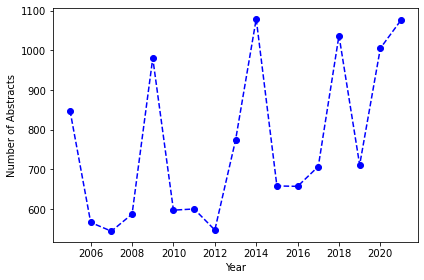

In [20]:
series = modified_df['date'].dt.year.value_counts().sort_index()
fig, axes = plt.subplots()
axes.plot(series.index, series.values, color = 'blue', linestyle = 'dashed', marker = 'o')
axes.set_xlabel('Year')
axes.set_ylabel('Number of Abstracts')
fig.tight_layout()
plt.show()

The conference was held in Hawaii during 2005, 2009, 2014, and 2018.
This location enabled the APS DNP to be held together with the Japanese Physical Society (JPS), which increased conference participation and therefore the number of abstracts.
For 2020 and 2021, the COVID-19 pandemic forced the conference to be held virtually, which also increased conference participation and therefore the number of abstracts.

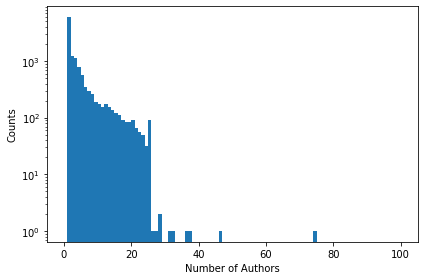

count    12475.000000
mean         4.214349
std          5.296551
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         74.000000
Name: author_count, dtype: float64


In [21]:
#series = modified_df['author_count']
series = modified_df.query('authors != "NA"')['author_count']

fig, axes = plt.subplots()
axes.hist(x = series, range = (0, 100), bins = 100)
axes.set_xlabel('Number of Authors')
axes.set_ylabel('Counts')
axes.set_yscale('log')
fig.tight_layout()
plt.show()

print(series.describe())

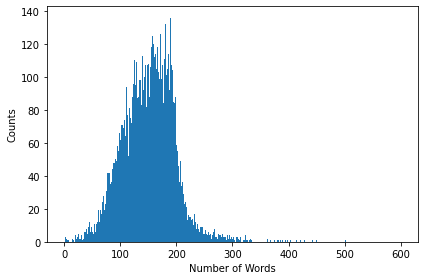

count    12448.000000
mean       150.113994
std         46.592360
min          1.000000
25%        119.000000
50%        152.000000
75%        181.000000
max        501.000000
Name: text_words_count, dtype: float64


In [22]:
fig, axes = plt.subplots()
#axes.hist(x = modified_df['text_words_count'], bins = 100)
axes.hist(x = modified_df.query('text != "NA"')['text_words_count'], range = (0, 600), bins = 600)
axes.set_xlabel('Number of Words')
axes.set_ylabel('Counts')
#axes.set_yscale('log')
fig.tight_layout()
plt.show()

#print(modified_df['text_words_count'].describe())
print(modified_df.query('text != "NA"')['text_words_count'].describe())

#print(modified_df[modified_df['text_words_count'] > 400])
#print(modified_df[modified_df['text_words_count'].gt(400)])

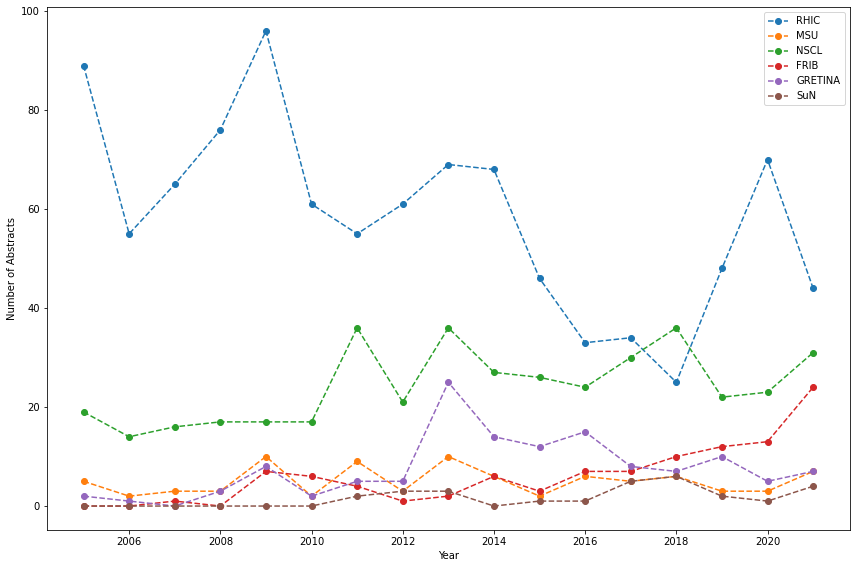

In [23]:
fig, axes = plt.subplots(figsize = (2 * 6, 2 * 4))
for text in ('RHIC', 'MSU', 'NSCL', 'FRIB', 'GRETINA', 'SuN'):
    #series = modified_df['text'].str.contains(text).astype(int).groupby(modified_df['date'].dt.year).sum()
    series = modified_df['date'].dt.year[modified_df['text'].str.contains(text)].value_counts().reindex(modified_df['date'].dt.year.unique(), fill_value = 0).sort_index()
    axes.plot(series.index, series.values, linestyle = 'dashed', marker = 'o', label = text)
axes.set_xlabel('Year')
axes.set_ylabel('Number of Abstracts')
axes.legend()
fig.tight_layout()
plt.show()    

# Natural language processing

Identify common words to be used as potential data-specific stop words.

In [24]:
all_words = [word for words in modified_df['text_words'].to_list() for word in words]

# Identify common words
print(pd.Series(all_words).value_counts()[:20])
print('=====')
# Identify uncommon words
print(pd.Series(all_words).value_counts()[-20:])

the     126624
of       79554
and      51450
to       41196
in       34897
a        33957
for      20941
The      20071
is       20068
at       15990
with     15615
will     13687
be       13542
from     11844
are      11447
on       10569
by       10200
as       10076
that      8666
this      7936
dtype: int64
=====
therein]             1
10$^{-7}$).          1
tetraquark.          1
\mathrm{pb^{-1}}$    1
90ps.                1
022503               1
\SI{3.35}{GeV}       1
backgrounds;         1
223-226,228RaF.      1
interaction).        1
Y.Hirayama           1
sion                 1
Excessive            1
$XYZ$                1
JLab-12GeV           1
$P_{c}^{+}$          1
(d)$^{2}$            1
(LS3D)               1
}+                   1
(MuHFS)              1
dtype: int64


In [25]:
# Libraries for text preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [26]:
# All common words from this particular data set are accounted for in nltk.corpus.stopwords.words('english')
common_words = set([word.lower() for word in pd.Series(all_words).value_counts()[:20].index.to_list()])
stop_words = stopwords.words('english')
for common_word in common_words:
    if common_word not in stop_words:
        print(common_word)

# Add custom stopwords
new_words = ['using', 'show', 'shown', 'result', 'also', 'previously', 'new']
assert all([new_word not in stop_words for new_word in new_words])
stop_words = set(stop_words)
stop_words = stop_words.union(new_words)

In [27]:
# Text preprocessing
# I still need to figure out how to deal with LaTeX formatting, or if that's even possible

lemmatizer = WordNetLemmatizer()

corpus = (modified_df['text']
          # Replace all non-alphabetic characters with spaces
          .apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))
          # Convert to lower case
          .apply(lambda x: x.lower())
          # Convert from string to list
          .apply(lambda x: x.split())
          # Remove stop words
          .apply(lambda x: filter(lambda word: word not in stop_words, x))
          # Lemmatize
          .apply(lambda x: list(map(lambda word: lemmatizer.lemmatize(word), x)))
          # Convert from list to string
          .apply(lambda x: ' '.join(x))
          # Convert from series to list
          .to_list())

In [28]:
corpus

['na',
 'program strange particle production proton currently underway clas spectrometer hall b jefferson laboratory measurement carried energy gev electron real photon beam available high polarization talk focus detailed overview result measurement program designed measure cross section polarization observables k lambda k sigma final state broad kinematic range q gev c w threshold gev spanning nearly full angular range kaon center mass system main goal program better understand reaction mechanism open strangeness production specifically respect different production mechanism lambda sigma hyperon additionally data strong sensitivity disentangle different resonant non resonant amplitude intermediate state study expected provide insight nature qcd confinement domain precision data demonstrated highly sensitive different model production process',
 'lambda hypernuclei extensively studied meson induced reaction pi k k pi kek bnl e e k reaction method hypernuclear spectroscopy unique advant

In [29]:
from wordcloud import WordCloud

word_cloud = WordCloud(
    width = 1600,
    height = 800,
    background_color = 'white',
    stopwords = stop_words,
    max_words = 100,
    max_font_size = 50,
    random_state = 42).generate(str(corpus))

for word, value in word_cloud.words_.items():
    print(word, value)

measurement 1.0
cross section 0.8957983193277311
study 0.6627450980392157
beta decay 0.5770308123249299
gamma ray 0.5434173669467787
data 0.5408963585434173
one 0.5330532212885154
measured 0.5070028011204482
well 0.4955182072829132
two 0.4588235294117647
system 0.4568627450980392
nucleus 0.45210084033613446
heavy ion 0.43221288515406164
detector 0.42857142857142855
et al 0.39551820728291315
effect 0.3927170868347339
use 0.3834733893557423
target 0.38123249299719886
method 0.37899159663865545
based 0.3442577030812325
experiment 0.334453781512605
used 0.330812324929972
different 0.32100840336134456
model 0.31932773109243695
observed 0.3179271708683473
present 0.31596638655462184
low energy 0.31596638655462184
however 0.3103641456582633
interaction 0.3092436974789916
analysis 0.30056022408963584
large 0.29635854341736695
including 0.29187675070028013
provide 0.28823529411764703
event 0.2868347338935574
calculation 0.2812324929971989
presented' 0.2700280112044818
within 0.2683473389355742


I should include some of the above words as stop words, but will continue for now.

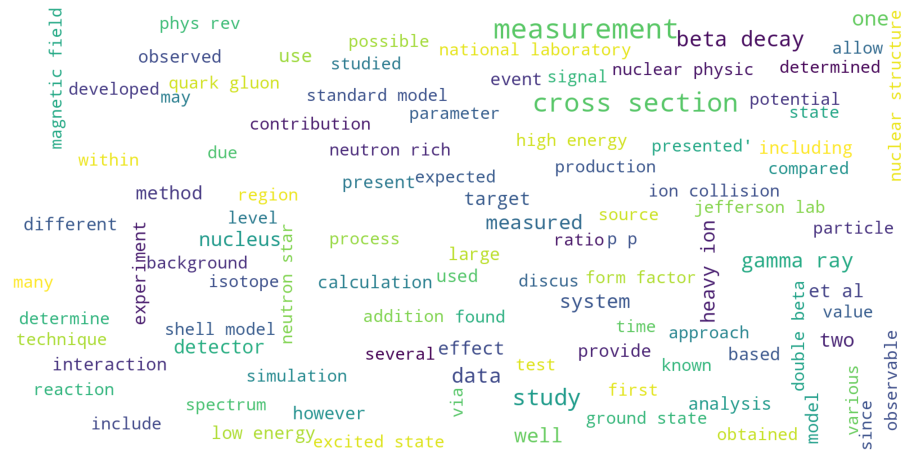

In [30]:
fig, axes = plt.subplots(figsize = (2 * 6.4, 2 * 4.8))
axes.imshow(X = word_cloud)
axes.axis('off')
fig.tight_layout()
plt.show()

## Text preparation (tokenization and vectorization)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_df = 0.8, stop_words = stop_words, max_features = 10000, ngram_range = (1, 3))
X = count_vectorizer.fit_transform(corpus)

In [32]:
print(len(count_vectorizer.vocabulary_.keys()))
print(list(count_vectorizer.vocabulary_.keys())[:10])

print(len(count_vectorizer.get_feature_names()))
print(count_vectorizer.get_feature_names()[:10])

assert (count_vectorizer.max_features ==
        len(count_vectorizer.vocabulary_.keys()) ==
        len(count_vectorizer.get_feature_names()))

10000
['na', 'program', 'strange', 'particle', 'production', 'proton', 'currently', 'underway', 'clas', 'spectrometer']
10000
['aa', 'ab', 'ab initio', 'ab initio calculation', 'ab initio core', 'ab initio method', 'ab initio nuclear', 'abelian', 'ability', 'able']


## Visualize top n-grams (unigram, bigram, trigram)

In [33]:
# From https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34
def get_top_ngram_words(corpus, ngram, number_of_words):
    count_vectorizer = CountVectorizer(max_df = 0.8, stop_words = stop_words, max_features = 2000, ngram_range = (ngram, ngram)).fit(corpus)
    bag_of_words = count_vectorizer.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    word_frequencies = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
    word_frequencies = sorted(word_frequencies, key = lambda x: x[1], reverse = True)
    return word_frequencies[:number_of_words]

In [34]:
top_1_words = get_top_ngram_words(corpus = corpus, ngram = 1, number_of_words = 20)
top_1_df = pd.DataFrame(data = top_1_words, columns = ['unigram', 'frequency'])

top_2_words = get_top_ngram_words(corpus = corpus, ngram = 2, number_of_words = 20)
top_2_df = pd.DataFrame(data = top_2_words, columns = ['bigram', 'frequency'])

top_3_words = get_top_ngram_words(corpus = corpus, ngram = 3, number_of_words = 20)
top_3_df = pd.DataFrame(data = top_3_words, columns = ['trigram', 'frequency'])

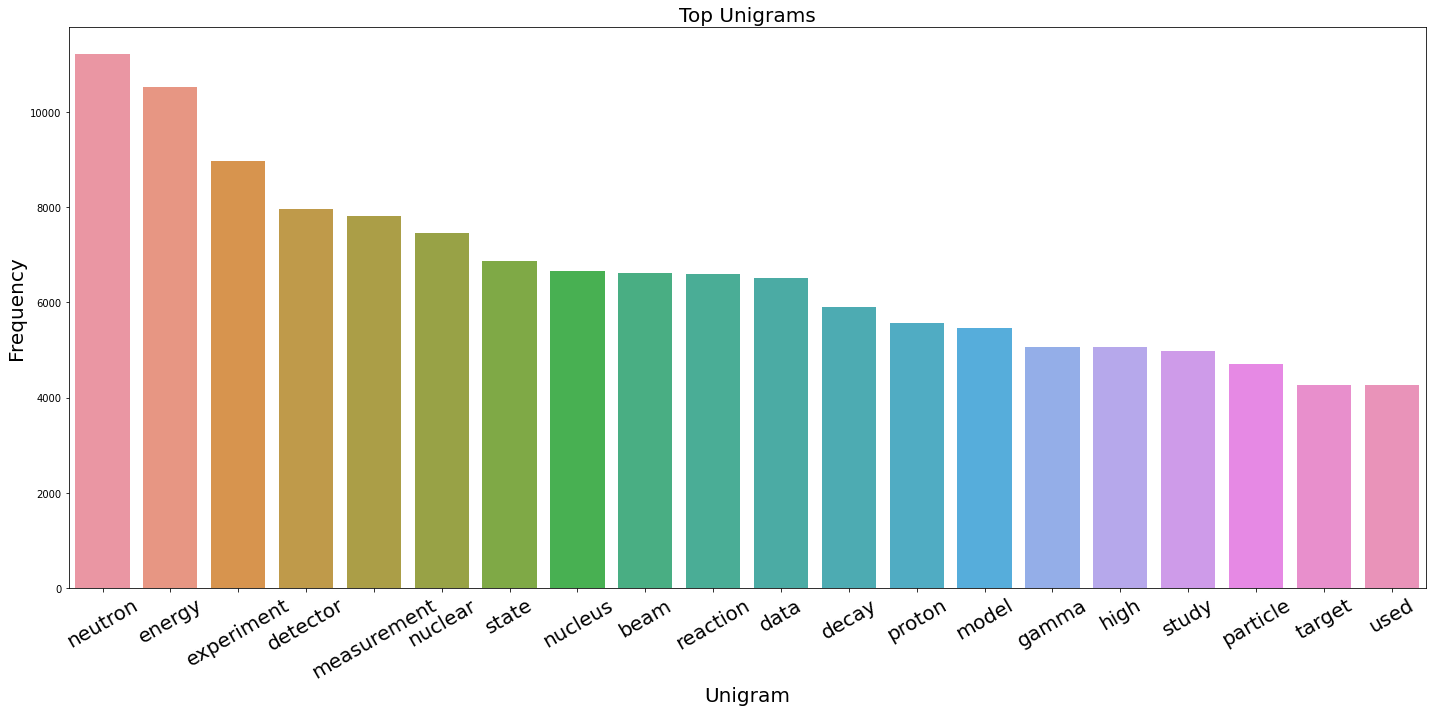

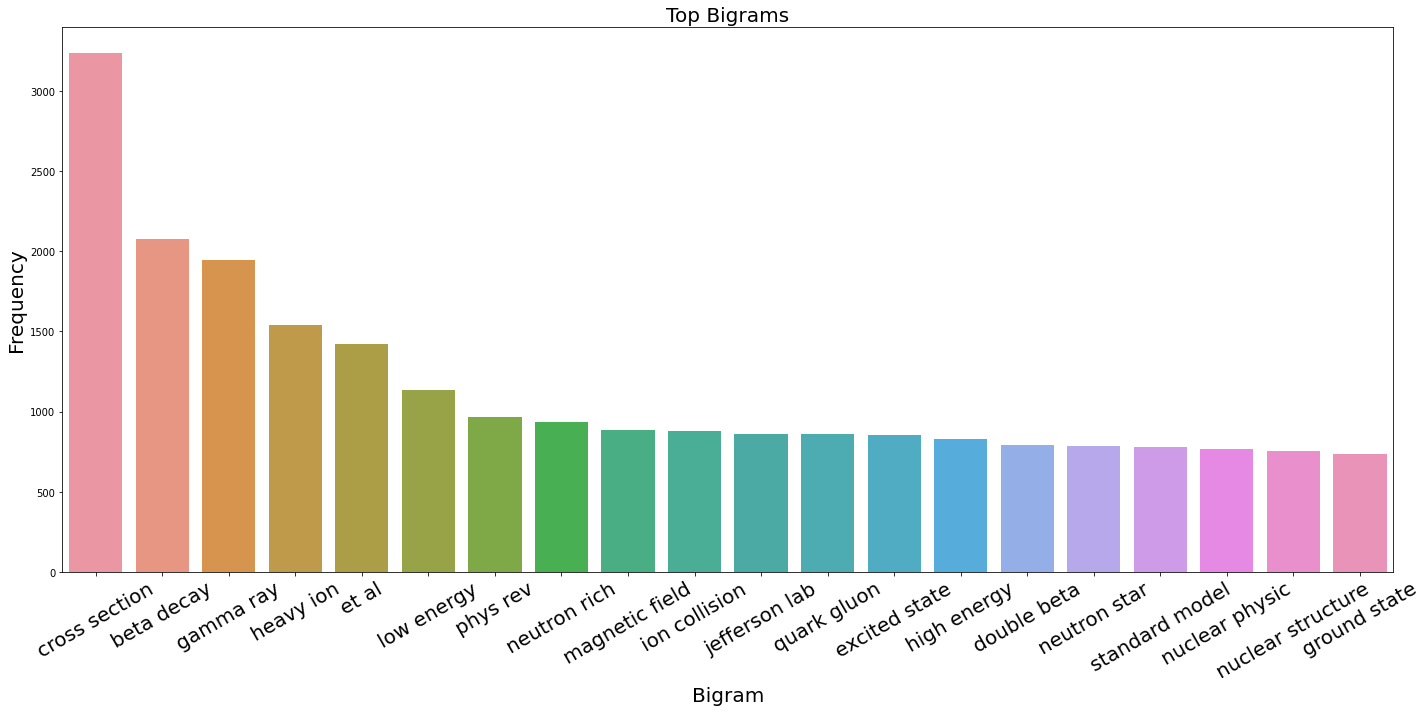

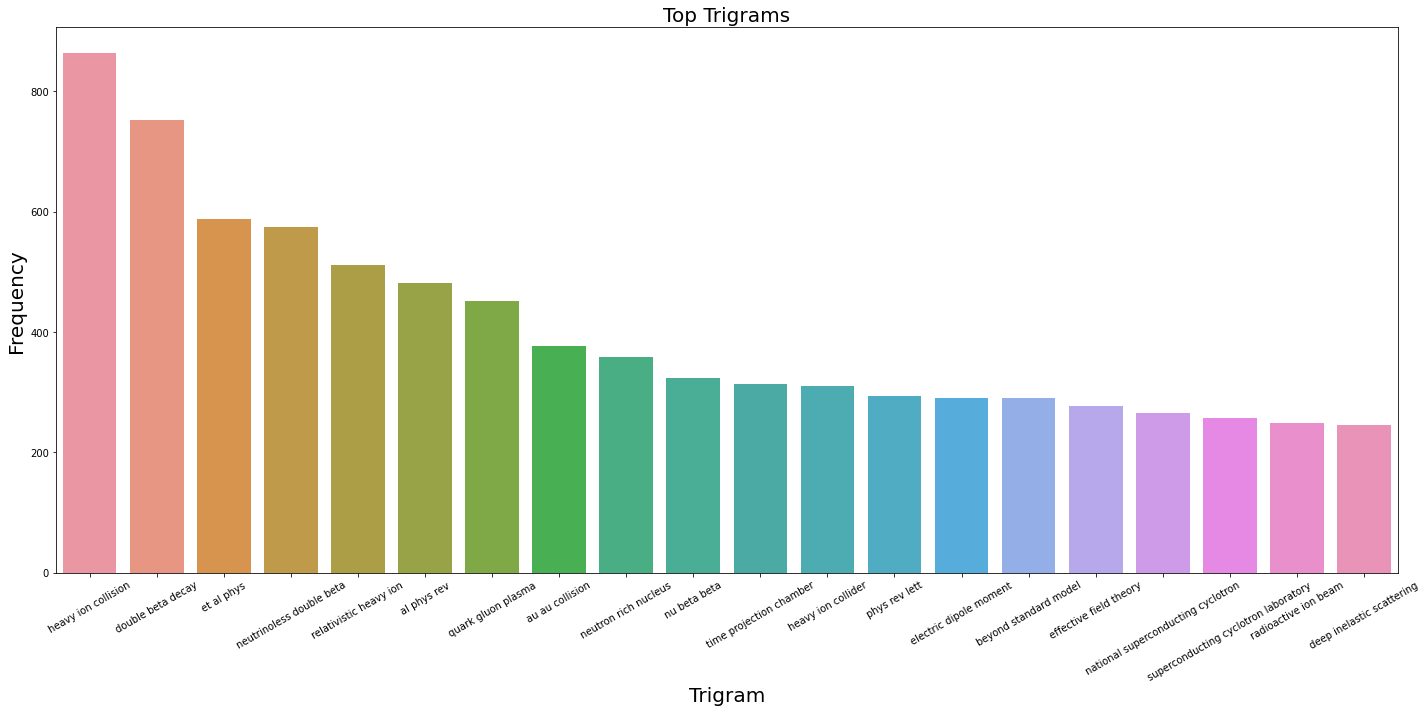

In [35]:
import seaborn as sns

fig, axes = plt.subplots(figsize = (20, 10))
bar = sns.barplot(x = 'unigram', y = 'frequency', data = top_1_df)
bar.set_xticklabels(bar.get_xticklabels(), rotation = 30, fontsize = 20)
bar.set_xlabel(bar.get_xlabel().capitalize(), fontsize = 20)
bar.set_ylabel(bar.get_ylabel().capitalize(), fontsize = 20)
bar.set_title('Top Unigrams', fontsize = 20)
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize = (20, 10))
bar = sns.barplot(x = 'bigram', y = 'frequency', data = top_2_df)
bar.set_xticklabels(bar.get_xticklabels(), rotation = 30, fontsize = 20)
bar.set_xlabel(bar.get_xlabel().capitalize(), fontsize = 20)
bar.set_ylabel(bar.get_ylabel().capitalize(), fontsize = 20)
bar.set_title('Top Bigrams', fontsize = 20)
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize = (20, 10))
bar = sns.barplot(x = 'trigram', y = 'frequency', data = top_3_df)
bar.set_xticklabels(bar.get_xticklabels(), rotation = 30, fontsize = 10)
bar.set_xlabel(bar.get_xlabel().capitalize(), fontsize = 20)
bar.set_ylabel(bar.get_ylabel().capitalize(), fontsize = 20)
bar.set_title('Top Trigrams', fontsize = 20)
fig.tight_layout()
plt.show()

I should include some of the above n-grams as stop words, but will continue for now.

My dissertation involved many of above n-grams:

- Unigram (selective)
    1. experiment
    2. detector
    3. measurement
    4. nucleus
    5. beam
    6. data
    7. decay
    8. gamma
- Bigram
    1. beta decay
    2. gamma ray
    3. low energy
    4. neutron rich
    5. excited state
    6. neutron star
    7. nuclear physic
    8. nuclear structure
    9. ground state
- Trigram
    1. double beta decay
    2. neutrinoless double beta
    3. neutron rich nucleus
    4. national superconducting cyclotron
    5. superconducting cyclotron laboratory
    6. radioactive ion beam

## Extract keywords using TF-IDF scores (term frequency, inverse document frequency)

In [36]:
# From https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(smooth_idf = True, use_idf = True)
tfidf_transformer.fit(X)

feature_names = count_vectorizer.get_feature_names()

# Document for which keywords need to be extracted
doc = corpus[7608]

tf_idf_vector = tfidf_transformer.transform(count_vectorizer.transform([doc]))

In [37]:
# From https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34
from scipy.sparse import coo_matrix

def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key = lambda x: (x[1], x[0]), reverse = True)

def extract_topn_from_vector(feature_names, sorted_items, topn):
    """Get the feature name and tf-idf score of top n items."""

    # Use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []

    # Word index and corresponding tf-idf score
    for idx, score in sorted_items:
        # Keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    results = {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]] = score_vals[idx]

    return results

sorted_items = sort_coo(tf_idf_vector.tocoo())
keywords = extract_topn_from_vector(feature_names, sorted_items, 5)

print('\nAbstract:')
print(doc)
print("\nKeywords:")
for keyword, score in keywords.items():
    print(keyword, score)


Abstract:
accurate modeling r process requires knowledge property related beta decay neutron rich nucleus beta decay half life beta delayed neutron emission probability property related beta decay strength distribution provide sensitive constraint theoretical model total absorption spectroscopy powerful technique accurately measure quantity needed calculate beta decay strength distribution effort improve model r process total absorption spectrum neutron rich nucleus mass region around recently measured summing nai tl sun detector nscl first ever total absorption spectroscopy measurement performed fragmentation facility total absorption spectrum presented extracted beta decay feeding intensity compared theoretical calculation

Keywords:
total absorption 0.354
absorption 0.294
beta 0.25
beta decay 0.225
total 0.223
